In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
TEST = 'ffmpeg_0_7'
LOG_FILE = f'results/{TEST}/log.csv'
WORKLOAD_FILE = f'results/{TEST}/workloadProfile.csv'

log_file = open(LOG_FILE, 'r')
workload_file = open(WORKLOAD_FILE, 'r')

# Read the log file into a DataFrame
metrics_df = pd.read_csv(log_file)
workload_df = pd.read_csv(workload_file, sep=';')

# Convert the timestamp to datetime
metrics_df['timestamp'] = pd.to_datetime(metrics_df['timestamp'])

# Set the timestamp as the index
metrics_df.set_index('timestamp', inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'results/ffmpeg_librosa/log.csv'

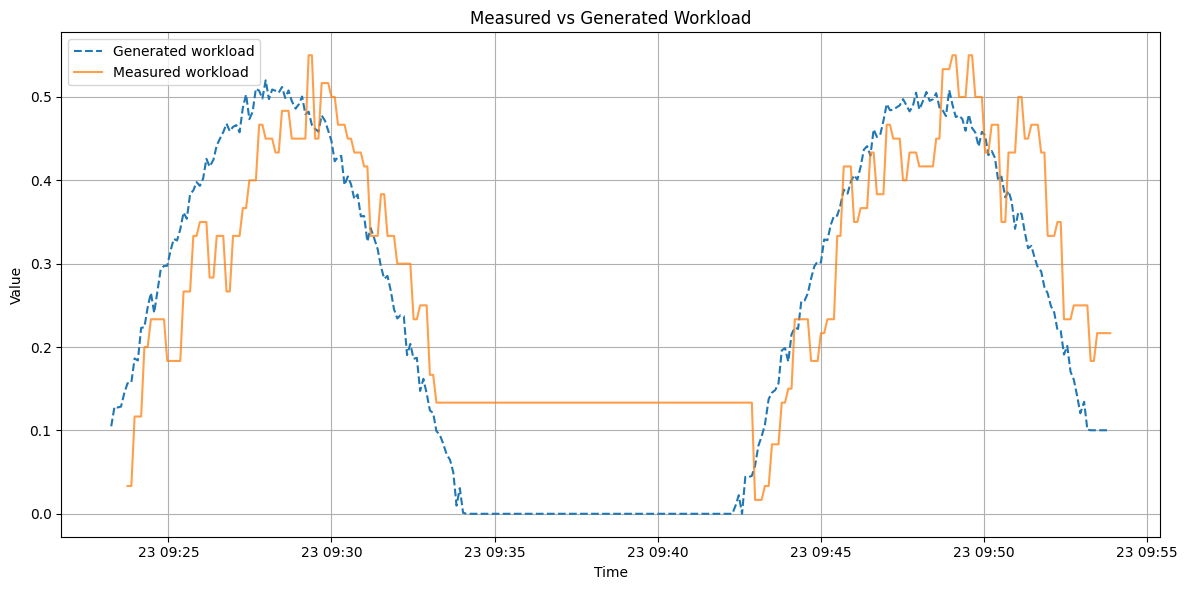

In [3]:
# Assuming workload_df['Time'] is in seconds and starts at the same time as metrics_df
# Get the start time from metrics_df index
start_time = metrics_df.index[0]

# Create a timestamp column in workload_df
workload_df['timestamp'] = pd.to_datetime(start_time) + pd.to_timedelta(workload_df['Time'], unit='s')
workload_df.set_index('timestamp', inplace=True)

# Align the RPS to the timestamps in metrics_df
aligned_rps = workload_df['RPS'].reindex(metrics_df.index, method='nearest')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(metrics_df.index, aligned_rps, label='Generated workload', linestyle='--')
plt.plot(metrics_df.index, metrics_df['workload'], label='Measured workload', alpha=0.75)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Measured vs Generated Workload')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

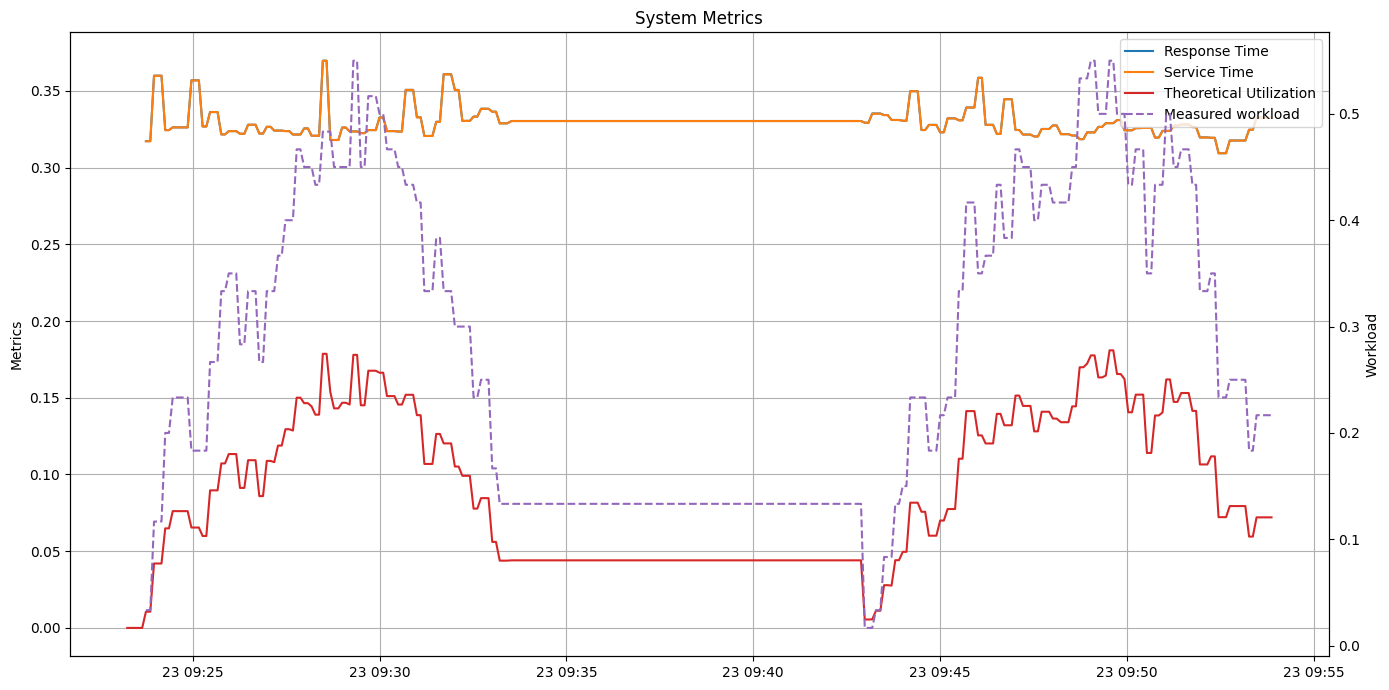

In [6]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot on the left y-axis
ax1.plot(metrics_df.index, metrics_df['response_time'], label='Response Time', color='tab:blue')
ax1.plot(metrics_df.index, metrics_df['service_time'], label='Service Time', color='tab:orange')
# ax1.plot(metrics_df.index, metrics_df['utilization'], label='Utilization', color='tab:green')
ax1.plot(metrics_df.index, metrics_df['theoretical_utilization'], label='Theoretical Utilization', color='tab:red')
ax1.set_ylabel('Metrics')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for workload and RPS
ax2 = ax1.twinx()
ax2.plot(metrics_df.index, metrics_df['workload'], label='Measured workload', color='tab:purple', linestyle='--')
# ax2.plot(metrics_df.index, aligned_rps, label='Generated workload', color='tab:brown', linestyle=':')
ax2.set_ylabel('Workload')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Title and layout
plt.title('System Metrics')
plt.tight_layout()
plt.show()
